# Stock Market Analysis on Car Companies 

I will be analyzing stock data related to a few car companies, from Jan 1 2012 to Jan 1 2017. This project is mainly just to challenge my skills with matplotlib, pandas, and numpy. Don't infer financial trading advice from the analysis we do here!

The purpose of this assignment is to view different correlations and movements of Tesla, Ford, and GM stock data. 

In [5]:
# Import libraries for the challenge 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Use pandas_datareader to obtain the historical stock information from Jan 1, 2012 to Jan 1, 2017
import pandas_datareader
import datetime
import pandas_datareader.data as web

In [11]:
# Create start and end date using datetime
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [16]:
# Use Yahoo Finance Api from the web to pull in data 
# start with Tesla 
tesla = web.DataReader('TSLA', 'yahoo', start, end)

In [17]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000


In [23]:
# Pull in Ford Stock data using the Yahoo Finance API from the web to pull in data 
ford = web.DataReader('F', 'yahoo', start, end)
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.687118
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.804530
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,8.004824
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,8.087703
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,8.149862


In [24]:
# Pull in GM Stock data using the Yahoo Finance API from the web to pull in data 
gm = web.DataReader('GM', 'yahoo', start, end)
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.103352
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.179853
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,16.960161
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.533915
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.472712


## Visualize the Data 
### Create a linear lot of all the car companies stocks price over time

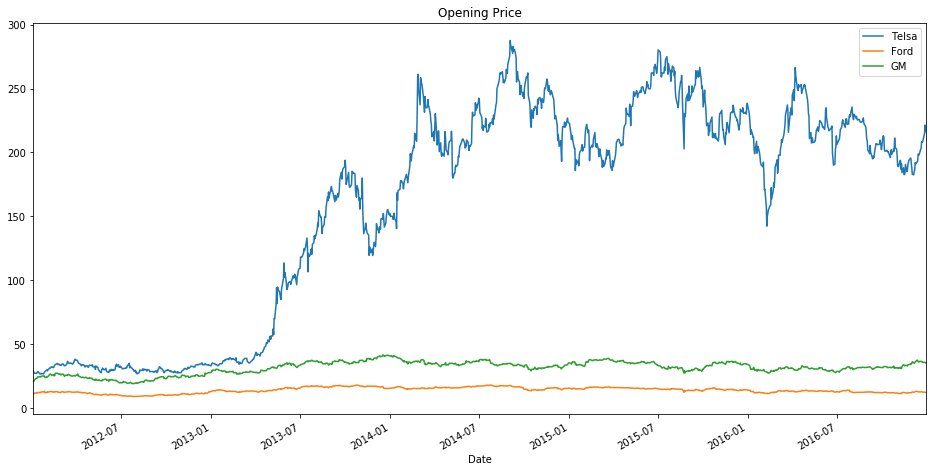

In [25]:
# create the plot for all 3 car companies
tesla['Open'].plot(label='Telsa', figsize=(16,8), title='Opening Price')
ford['Open'].plot(label='Ford')
gm['Open'].plot(label='GM')
plt.legend()

### Plot the Volume of stock traded each day

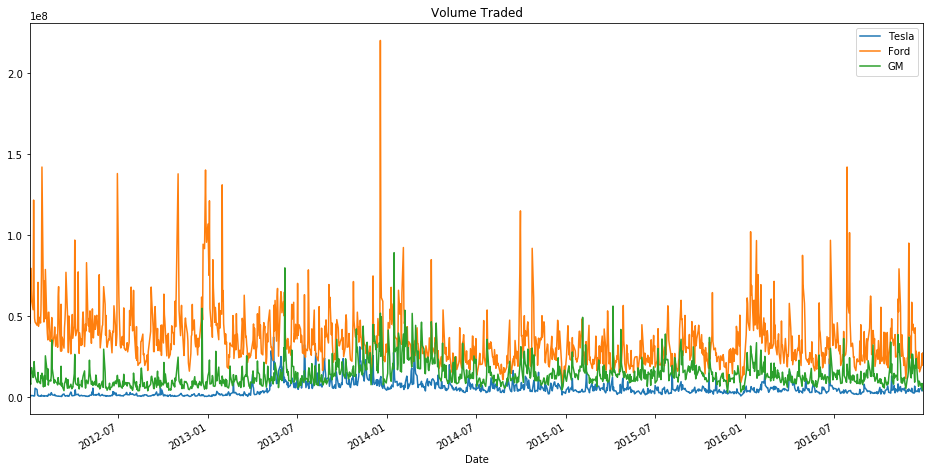

In [26]:
# create a plot representing the amount of volume for each car company in one graph. 
tesla['Volume'].plot(label='Tesla', figsize=(16, 8), title='Volume Traded')
ford['Volume'].plot(label='Ford')
gm['Volume'].plot(label='GM')
plt.legend()

**Interesting, looks like ford had a really big spike where in late 2013. What was the date of this maximum trading volume for ford?**
**What happened that day?**

In [27]:
#Find the exact date of the max volume for ford in late 2013
ford['Volume'].argmax()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


Timestamp('2013-12-18 00:00:00')

After, googling the date for Ford I found out there was an investor meeting where they announced that they would aggresively push new product launches into the next year and that may cut profits for the 2014.

Sources: 
    - https://money.cnn.com/2013/12/18/news/companies/ford-profit/index.html

### Total Traded Amount

**The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.

In [30]:
# Create the Total Traded arugment
tesla['Total Traded'] = tesla['Open'] * tesla['Volume']
ford['Total Traded'] = ford['Open'] * ford['Volume']
gm['Total Traded'] = gm['Open'] * gm['Volume']

Text(0.5, 1.0, 'Tesla, Ford, and GM Total Traded Amount')

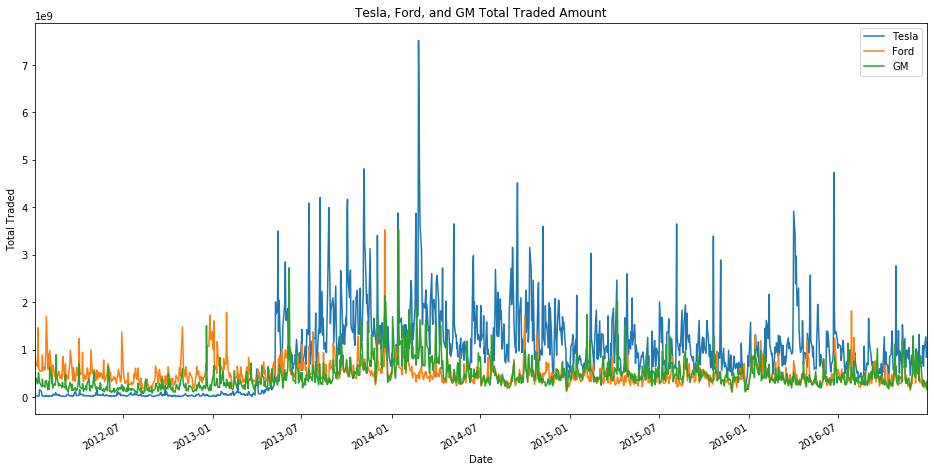

In [40]:
# Plot the Total Traded against the time index 
tesla['Total Traded'].plot(label='Tesla', figsize=(16, 8))
ford['Total Traded'].plot(label='Ford')
gm['Total Traded'].plot(label='GM')
plt.legend()
plt.ylabel('Total Traded')
plt.title('Tesla, Ford, and GM Total Traded Amount')

**Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened?**

In [37]:
# Find out the day of the max Total Traded amount for Tesla.
tesla['Total Traded'].argmax()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


Timestamp('2014-02-25 00:00:00')

After further investigation of the date and tesla stock I found out information that a Morgan Stanley analyst gave Tesla a higher rating based off stronger than expected profits.
Sources: 
    - https://money.cnn.com/2014/02/25/investing/tesla-record-high/
    - https://blogs.wsj.com/moneybeat/2014/02/25/tesla-shares-surge-on-morgan-stanley-report/        

### Ploting MA(Moving Averages)

Text(0.5, 1.0, 'GM Stock')

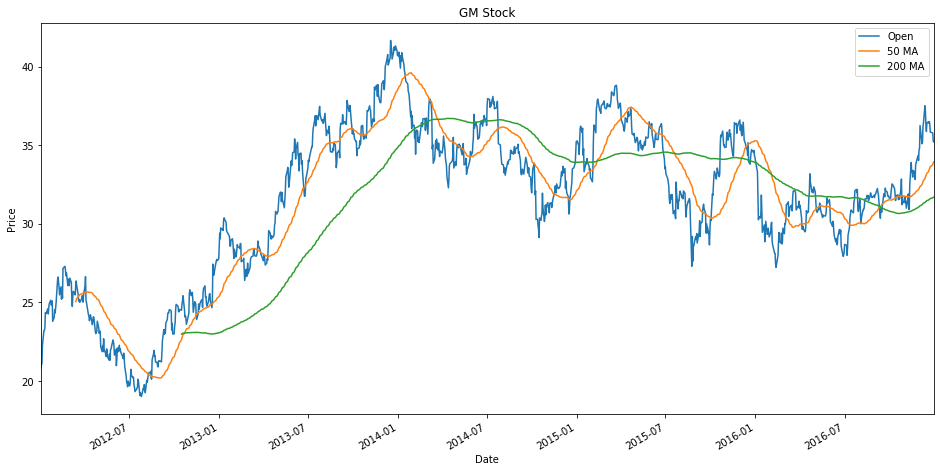

In [39]:
# Plot out the MA50 and MA200 for GM
gm['50 MA'] = gm['Open'].rolling(50).mean()
gm['200 MA'] = gm['Open'].rolling(200).mean()
gm[['Open', '50 MA', '200 MA']].plot(label='GM', figsize=(16,8))
plt.ylabel('Price')
plt.title('GM Stock')